In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import datetime
from datetime import date
import statsmodels.tsa.stattools as ts
from scipy.stats import linregress

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
from sklearn import preprocessing


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Data Preparation

- get new source of data
- real-time top50
- all hourly, daily, weekly
- training(400 = 80%) + test(20%) = 500 points  ; 500 hours, 500 days, 500 weeks ???
- training = 90% train + 10% validation

## Top 50

- real time web scraping from CoinGecko
- getting name and symbol of top50 coin

In [ ]:
url = 'https://www.coingecko.com/'
# resposta = requests.get(url)
r = requests.get(url)

In [ ]:
# soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
# coingecko = pd.read_html(str(soup))[0]

In [ ]:
# coingecko = pd.read_html('https://coingecko.com/')

In [ ]:
# coingecko.head()

In [ ]:
# coingecko = coingecko[:50]

In [ ]:
# name_list = []
# sym_list = []

# for curr in list(coingecko['Coin']):
#     tmp = curr.split(" ")
#     sym_list.append(tmp[-1])
#     name_list.append(" ".join(tmp[:-1]))


In [ ]:
name_list = ['Bitcoin',
 'Ethereum',
 'Tether',
 'USD Coin',
 'BNB',
 'XRP',
 'Binance USD',
 'Cardano',
 'Dogecoin',
 'Solana',
 'Polygon',
 'OKB',
 'Lido Staked Ether',
 'Polkadot',
 'Shiba Inu',
 'Litecoin',
 'TRON',
 'Avalanche',
 'Dai',
 'Uniswap',
 'Wrapped Bitcoin',
 'Cosmos Hub',
 'Chainlink',
 'Toncoin',
 'Monero',
 'LEO Token',
 'Ethereum Classic',
 'Bitcoin Cash',
 'Stellar',
 'Quant',
 'Lido DAO',
 'NEAR Protocol',
 'ApeCoin',
 'Aptos',
 'Cronos',
 'Filecoin',
 'Algorand',
 'Hedera',
 'VeChain',
 'Internet Computer',
 'Axie Infinity',
 'Decentraland',
 'The Sandbox',
 'Flow',
 'Aave',
 'EOS',
 'MultiversX',
 'Theta Network',
 'Terra Luna Classic',
 'Fantom']

In [ ]:
sym_list = ['BTC',
 'ETH',
 'USDT',
 'USDC',
 'BNB',
 'XRP',
 'BUSD',
 'ADA',
 'DOGE',
 'SOL',
 'MATIC',
 'OKB',
 'STETH',
 'DOT',
 'SHIB',
 'LTC',
 'TRX',
 'AVAX',
 'DAI',
 'UNI',
 'WBTC',
 'ATOM',
 'LINK',
 'TON',
 'XMR',
 'LEO',
 'ETC',
 'BCH',
 'XLM',
 'QNT',
 'LDO',
 'NEAR',
 'APE',
 'APT',
 'CRO',
 'FIL',
 'ALGO',
 'HBAR',
 'VET',
 'ICP',
 'AXS',
 'MANA',
 'SAND',
 'FLOW',
 'AAVE',
 'EOS',
 'EGLD',
 'THETA',
 'LUNC',
 'FTM']


## Historical data

In [ ]:
today_date = pd.to_datetime('today')
first_date = datetime.datetime(day=1, month=1, year=2018)
print(today_date.strftime('%Y%m%d/'))

20230228/


Santiment API:
- all interval
- 42 available currencies

https://santiment.net/?via=sun&utm_campaign=yura

https://medium.datadriveninvestor.com/using-python-to-get-crypto-market-data-ba173d93896b

In [ ]:
pip install sanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 KB 1.4 MB/s eta 0:00:00


In [ ]:
import san

In [ ]:
# interval param = 1h 1d 1w
org_data = pd.DataFrame()
to_dates = pd.to_datetime('today').strftime('%Y-%m-%d')

In [ ]:
from_dates = str(pd.to_datetime('today').year-1)+'-'+str(pd.to_datetime('today').month)+'-'+str(pd.to_datetime('today').day)

In [ ]:
def name_transform(x):
    x = x.lower()
    x = '-'.join(x.split())
    return x

In [ ]:
name_transform('Binance USD')

'binance-usd'

In [ ]:
for curr in name_list:
    curr_ = 'ohlc/' + name_transform(curr)
    data_temp = san.get(
                        curr_,
                        from_date="2021-11-01",
                        to_date=to_dates,
                        interval="1d" # interval param = 1h 1d 1w
                        )
    if not data_temp.empty:
        close = data_temp['closePriceUsd'].to_frame()
        close.rename(columns = {'closePriceUsd':curr},inplace=True)
        org_data = pd.concat([org_data,close],axis=1)

In [ ]:
org_data

,Bitcoin,Ethereum,Tether,USD Coin,BNB,XRP,Binance USD,Cardano,Dogecoin,Solana,...,VeChain,Internet Computer,Axie Infinity,Decentraland,The Sandbox,Flow,Aave,EOS,Theta Network,Fantom
datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-01 00:00:00+00:00,61004.408021,4324.626794,1.000291,0.999861,NaN,1.092867,0.999737,1.950002,0.271728,203.545084,...,0.136935,46.662598,137.065876,3.048130,2.110558,14.006063,324.042105,4.632726,7.331013,2.704077
2021-11-02 00:00:00+00:00,63226.401097,4584.798668,1.000815,0.999896,NaN,1.136196,1.000015,1.971377,0.273121,220.239587,...,0.140114,47.176170,140.442269,3.082580,3.066088,14.367142,324.970802,4.700221,7.614067,2.715717
2021-11-03 00:00:00+00:00,62970.047426,4607.193607,1.000678,1.000225,NaN,1.208796,1.000062,2.063701,0.269407,242.898815,...,0.137137,46.715796,141.532214,2.854916,3.216488,13.919854,323.985678,4.708119,7.416211,2.668015
2021-11-04 00:00:00+00:00,61452.230587,4537.324081,1.000857,1.000206,NaN,1.202003,1.000219,1.984882,0.263280,247.387778,...,0.152404,46.037894,145.827481,2.510128,2.692392,13.874061,333.097873,4.547420,7.727905,2.763579
2021-11-05 00:00:00+00:00,61125.674269,4486.243405,1.001553,1.000562,NaN,1.161533,1.000590,1.986206,0.261465,236.474334,...,0.158926,49.501202,151.911746,2.605363,2.567213,13.950764,327.720914,4.517483,7.584415,2.656888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24 00:00:00+00:00,23198.127488,1608.373158,1.000070,1.000045,NaN,0.378477,1.000300,0.365819,0.080900,23.053036,...,0.027730,6.288458,10.033061,0.668193,0.721873,1.180247,81.509047,1.118265,NaN,0.461994
2023-02-25 00:00:00+00:00,23175.375636,1594.914953,1.000132,1.000287,NaN,0.378085,1.000029,0.362364,0.080786,22.523399,...,0.026944,6.115335,9.816320,0.650308,0.710595,1.216287,79.889936,1.108315,NaN,0.456825
2023-02-26 00:00:00+00:00,23561.212911,1640.817156,1.000087,1.000136,NaN,0.378041,1.000367,0.368973,0.082202,23.256089,...,0.028221,6.239093,10.008968,0.663480,0.718721,1.225350,82.108667,1.124520,NaN,0.473602


## Data Cleansing

8 currencies with no recent data

In [ ]:
ava_curr = org_data.iloc[-1].notnull()
ava_curr = ava_curr[lambda i:i==True].index

In [ ]:
len(ava_curr)

37

In [ ]:
data = org_data[ava_curr]

In [ ]:
# data = data.iloc[-365:]
data

,Bitcoin,Ethereum,Tether,USD Coin,XRP,Binance USD,Cardano,Dogecoin,Solana,OKB,...,Algorand,VeChain,Internet Computer,Axie Infinity,Decentraland,The Sandbox,Flow,Aave,EOS,Fantom
datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-01 00:00:00+00:00,61004.408021,4324.626794,1.000291,0.999861,1.092867,0.999737,1.950002,0.271728,203.545084,22.768891,...,1.833672,0.136935,46.662598,137.065876,3.048130,2.110558,14.006063,324.042105,4.632726,2.704077
2021-11-02 00:00:00+00:00,63226.401097,4584.798668,1.000815,0.999896,1.136196,1.000015,1.971377,0.273121,220.239587,22.360249,...,1.861833,0.140114,47.176170,140.442269,3.082580,3.066088,14.367142,324.970802,4.700221,2.715717
2021-11-03 00:00:00+00:00,62970.047426,4607.193607,1.000678,1.000225,1.208796,1.000062,2.063701,0.269407,242.898815,22.522802,...,1.927815,0.137137,46.715796,141.532214,2.854916,3.216488,13.919854,323.985678,4.708119,2.668015
2021-11-04 00:00:00+00:00,61452.230587,4537.324081,1.000857,1.000206,1.202003,1.000219,1.984882,0.263280,247.387778,22.171214,...,1.858965,0.152404,46.037894,145.827481,2.510128,2.692392,13.874061,333.097873,4.547420,2.763579
2021-11-05 00:00:00+00:00,61125.674269,4486.243405,1.001553,1.000562,1.161533,1.000590,1.986206,0.261465,236.474334,24.498965,...,1.848338,0.158926,49.501202,151.911746,2.605363,2.567213,13.950764,327.720914,4.517483,2.656888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24 00:00:00+00:00,23198.127488,1608.373158,1.000070,1.000045,0.378477,1.000300,0.365819,0.080900,23.053036,49.262225,...,0.256846,0.027730,6.288458,10.033061,0.668193,0.721873,1.180247,81.509047,1.118265,0.461994
2023-02-25 00:00:00+00:00,23175.375636,1594.914953,1.000132,1.000287,0.378085,1.000029,0.362364,0.080786,22.523399,50.840748,...,0.251300,0.026944,6.115335,9.816320,0.650308,0.710595,1.216287,79.889936,1.108315,0.456825
2023-02-26 00:00:00+00:00,23561.212911,1640.817156,1.000087,1.000136,0.378041,1.000367,0.368973,0.082202,23.256089,53.000167,...,0.255726,0.028221,6.239093,10.008968,0.663480,0.718721,1.225350,82.108667,1.124520,0.473602


dropping Aptos,Chain columns: only available after 2022-10-19

33 currencies remaining

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Aptos                352
ApeCoin                2
Bitcoin                0
Ethereum Classic       0
Stellar                0
Quant                  0
Lido DAO               0
NEAR Protocol          0
Algorand               0
VeChain                0
Internet Computer      0
Axie Infinity          0
Decentraland           0
The Sandbox            0
Flow                   0
Aave                   0
EOS                    0
Bitcoin Cash           0
Monero                 0
Ethereum               0
Toncoin                0
Tether                 0
USD Coin               0
XRP                    0
Binance USD            0
Cardano                0
Dogecoin               0
Solana                 0
OKB                    0
Shiba Inu              0
Litecoin               0
TRON                   0
Avalanche              0
Uniswap                0
Wrapped Bitcoin        0
Chainlink              0
Fantom                 0
dtype: int64

In [ ]:
# data = data.drop(['Chain'],axis=1)

In [ ]:
data = data.drop(['Aptos'],axis=1)

In [ ]:
data = data.drop(['ApeCoin'],axis=1)

In [ ]:
data = data.drop(['XRP'],axis=1)

In [ ]:
data.columns

Index(['Bitcoin', 'Ethereum', 'Tether', 'USD Coin', 'Binance USD', 'Cardano',
       'Dogecoin', 'Solana', 'OKB', 'Shiba Inu', 'Litecoin', 'TRON',
       'Avalanche', 'Uniswap', 'Wrapped Bitcoin', 'Chainlink', 'Toncoin',
       'Monero', 'Ethereum Classic', 'Bitcoin Cash', 'Stellar', 'Quant',
       'Lido DAO', 'NEAR Protocol', 'Algorand', 'VeChain', 'Internet Computer',
       'Axie Infinity', 'Decentraland', 'The Sandbox', 'Flow', 'Aave', 'EOS',
       'Fantom'],
      dtype='object')

In [ ]:
data.head()

,Bitcoin,Ethereum,Tether,USD Coin,Binance USD,Cardano,Dogecoin,Solana,OKB,Shiba Inu,...,Algorand,VeChain,Internet Computer,Axie Infinity,Decentraland,The Sandbox,Flow,Aave,EOS,Fantom
datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-01 00:00:00+00:00,61004.408021,4324.626794,1.000291,0.999861,0.999737,1.950002,0.271728,203.545084,22.768891,0.000072,...,1.833672,0.136935,46.662598,137.065876,3.048130,2.110558,14.006063,324.042105,4.632726,2.704077
2021-11-02 00:00:00+00:00,63226.401097,4584.798668,1.000815,0.999896,1.000015,1.971377,0.273121,220.239587,22.360249,0.000069,...,1.861833,0.140114,47.176170,140.442269,3.082580,3.066088,14.367142,324.970802,4.700221,2.715717
2021-11-03 00:00:00+00:00,62970.047426,4607.193607,1.000678,1.000225,1.000062,2.063701,0.269407,242.898815,22.522802,0.000055,...,1.927815,0.137137,46.715796,141.532214,2.854916,3.216488,13.919854,323.985678,4.708119,2.668015
2021-11-04 00:00:00+00:00,61452.230587,4537.324081,1.000857,1.000206,1.000219,1.984882,0.263280,247.387778,22.171214,0.000049,...,1.858965,0.152404,46.037894,145.827481,2.510128,2.692392,13.874061,333.097873,4.547420,2.763579
2021-11-05 00:00:00+00:00,61125.674269,4486.243405,1.001553,1.000562,1.000590,1.986206,0.261465,236.474334,24.498965,0.000062,...,1.848338,0.158926,49.501202,151.911746,2.605363,2.567213,13.950764,327.720914,4.517483,2.656888


In [ ]:
data.isnull().sum().sort_values(ascending=False)

Bitcoin              0
VeChain              0
Bitcoin Cash         0
Stellar              0
Quant                0
Lido DAO             0
NEAR Protocol        0
Algorand             0
Internet Computer    0
Ethereum             0
Axie Infinity        0
Decentraland         0
The Sandbox          0
Flow                 0
Aave                 0
EOS                  0
Ethereum Classic     0
Monero               0
Toncoin              0
Chainlink            0
Wrapped Bitcoin      0
Uniswap              0
Avalanche            0
TRON                 0
Litecoin             0
Shiba Inu            0
OKB                  0
Solana               0
Dogecoin             0
Cardano              0
Binance USD          0
USD Coin             0
Tether               0
Fantom               0
dtype: int64

## Normalization using MinMaxScaler

In [ ]:
# data_val = data.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# data_scaled = min_max_scaler.fit_transform(data_val)
# data = pd.DataFrame(data_scaled, columns=data.columns)
# data = data.set_index(data.index)
# data

# Pair selection

### Find cointegrated pairs + Heatmap

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    tstat_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        # for j in range(i+1, n):
        for j in range(n):
            c1 = data[keys[i]]
            c2 = data[keys[j]]
            result = coint(c1, c2) # use built in function
            tstat = result[0]
            pvalue = result[1]
            tstat_matrix[i, j] = tstat
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return tstat_matrix, pvalue_matrix, pairs

In [ ]:
data

,Bitcoin,Ethereum,Tether,USD Coin,Binance USD,Cardano,Dogecoin,Solana,OKB,Shiba Inu,...,Algorand,VeChain,Internet Computer,Axie Infinity,Decentraland,The Sandbox,Flow,Aave,EOS,Fantom
datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-01 00:00:00+00:00,61004.408021,4324.626794,1.000291,0.999861,0.999737,1.950002,0.271728,203.545084,22.768891,0.000072,...,1.833672,0.136935,46.662598,137.065876,3.048130,2.110558,14.006063,324.042105,4.632726,2.704077
2021-11-02 00:00:00+00:00,63226.401097,4584.798668,1.000815,0.999896,1.000015,1.971377,0.273121,220.239587,22.360249,0.000069,...,1.861833,0.140114,47.176170,140.442269,3.082580,3.066088,14.367142,324.970802,4.700221,2.715717
2021-11-03 00:00:00+00:00,62970.047426,4607.193607,1.000678,1.000225,1.000062,2.063701,0.269407,242.898815,22.522802,0.000055,...,1.927815,0.137137,46.715796,141.532214,2.854916,3.216488,13.919854,323.985678,4.708119,2.668015
2021-11-04 00:00:00+00:00,61452.230587,4537.324081,1.000857,1.000206,1.000219,1.984882,0.263280,247.387778,22.171214,0.000049,...,1.858965,0.152404,46.037894,145.827481,2.510128,2.692392,13.874061,333.097873,4.547420,2.763579
2021-11-05 00:00:00+00:00,61125.674269,4486.243405,1.001553,1.000562,1.000590,1.986206,0.261465,236.474334,24.498965,0.000062,...,1.848338,0.158926,49.501202,151.911746,2.605363,2.567213,13.950764,327.720914,4.517483,2.656888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24 00:00:00+00:00,23198.127488,1608.373158,1.000070,1.000045,1.000300,0.365819,0.080900,23.053036,49.262225,0.000013,...,0.256846,0.027730,6.288458,10.033061,0.668193,0.721873,1.180247,81.509047,1.118265,0.461994
2023-02-25 00:00:00+00:00,23175.375636,1594.914953,1.000132,1.000287,1.000029,0.362364,0.080786,22.523399,50.840748,0.000012,...,0.251300,0.026944,6.115335,9.816320,0.650308,0.710595,1.216287,79.889936,1.108315,0.456825
2023-02-26 00:00:00+00:00,23561.212911,1640.817156,1.000087,1.000136,1.000367,0.368973,0.082202,23.256089,53.000167,0.000013,...,0.255726,0.028221,6.239093,10.008968,0.663480,0.718721,1.225350,82.108667,1.124520,0.473602


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  

Text(0.5, 1.0, 'p-value of cointegrated pair from training set')

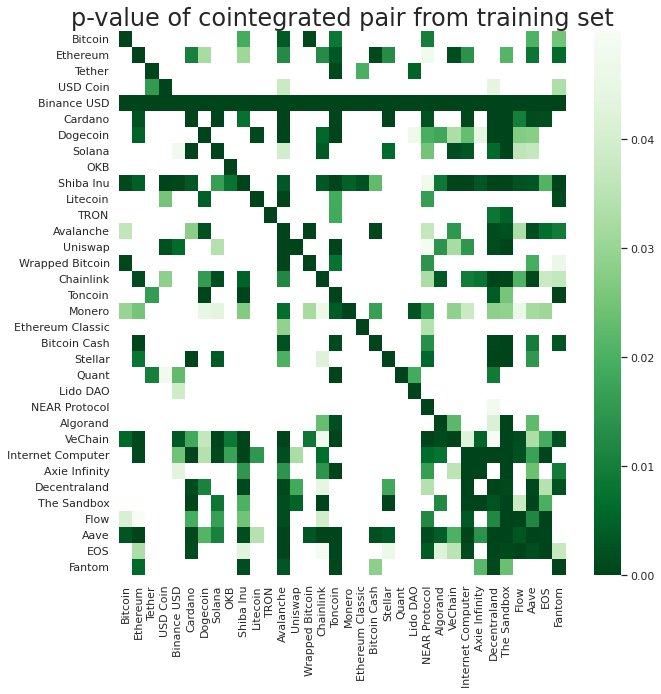

In [ ]:
tstat, pvalues, pairs = find_cointegrated_pairs(data)
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=data.columns, yticklabels=data.columns, cmap='Greens_r'
                , mask = (pvalues >= 0.05)
                )
plt.title('p-value of cointegrated pair from training set',fontsize=24)

In [ ]:
df_pvalues = pd.DataFrame(pvalues, columns = data.columns, index = data.columns)
df_pvalues

,Bitcoin,Ethereum,Tether,USD Coin,Binance USD,Cardano,Dogecoin,Solana,OKB,Shiba Inu,...,Algorand,VeChain,Internet Computer,Axie Infinity,Decentraland,The Sandbox,Flow,Aave,EOS,Fantom
Bitcoin,0.000000e+00,1.333147e-01,6.850190e-01,0.325227,0.231072,1.079239e-01,1.898012e-01,4.593485e-01,0.500086,1.907665e-02,...,5.949660e-01,1.625951e-01,1.659985e-01,3.157162e-01,2.245615e-01,5.944575e-02,6.393855e-02,2.039906e-02,3.959895e-01,2.461533e-02
Ethereum,1.542993e-01,0.000000e+00,7.005333e-01,0.509786,0.338425,1.017264e-02,3.233901e-02,1.158143e-01,0.728500,3.064669e-02,...,2.031391e-01,1.743358e-03,1.386997e-02,1.369406e-01,2.473169e-01,2.117760e-02,6.492063e-02,8.163694e-03,5.408370e-02,5.981830e-03
Tether,2.636618e-01,2.497580e-01,0.000000e+00,0.181631,0.312754,2.151991e-01,2.108687e-01,2.415549e-01,0.315494,1.411780e-01,...,2.041269e-01,1.804212e-01,1.569984e-01,1.950453e-01,1.585905e-01,1.439117e-01,1.940727e-01,2.089448e-01,1.860819e-01,1.450384e-01
USD Coin,5.839184e-02,6.204161e-02,1.565495e-02,0.000000,0.115648,5.863964e-02,8.694826e-02,7.709673e-02,0.196201,5.699741e-02,...,7.195045e-02,8.504370e-02,6.839431e-02,7.492180e-02,4.369562e-02,5.763593e-02,6.452196e-02,6.517953e-02,5.788157e-02,3.345599e-02
Binance USD,1.785218e-08,1.461589e-08,1.178197e-28,0.000009,0.000000,1.468428e-08,1.850512e-08,1.751545e-08,0.000051,5.400060e-09,...,2.604244e-08,1.728943e-08,1.399490e-08,1.539572e-08,8.797563e-09,1.831636e-08,1.093891e-08,1.033301e-05,9.562902e-09,1.355882e-08
Cardano,7.333533e-02,2.530870e-03,2.730570e-01,0.147262,0.065019,0.000000e+00,1.272468e-01,8.551109e-05,0.081404,7.270856e-03,...,1.340742e-01,1.110202e-01,5.470649e-04,7.345092e-02,2.593269e-07,1.011898e-13,9.821628e-03,1.184965e-03,1.693904e-03,6.787231e-02
Dogecoin,5.517060e-02,4.505226e-03,2.964259e-01,0.197317,0.057648,5.494726e-02,0.000000e+00,6.775441e-02,0.182346,2.274613e-01,...,1.805271e-02,3.334032e-02,2.324850e-02,4.411690e-02,1.238665e-04,1.075311e-07,2.721874e-02,2.770571e-02,2.293272e-01,7.490243e-02
Solana,4.714818e-01,5.402262e-02,2.539504e-01,0.162467,0.048167,1.947817e-04,1.388709e-01,0.000000e+00,0.688698,8.049267e-02,...,1.292072e-01,1.427040e-03,2.956574e-03,1.594253e-01,5.872648e-03,9.044806e-07,3.606985e-02,3.686079e-02,1.615213e-01,1.103800e-01
OKB,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Shiba Inu,8.215316e-04,4.222525e-03,1.611214e-01,0.000191,0.000492,3.243194e-03,2.387682e-01,1.656415e-02,0.007691,0.000000e+00,...,8.673933e-03,1.919424e-05,2.168990e-05,2.984974e-03,1.516125e-10,1.108380e-06,2.519617e-03,2.664911e-03,2.070477e-02,1.765695e-05


In [ ]:
df_pvalues['Bitcoin']['Ethereum Classic'] # non-coint

0.3311227433816718

In [ ]:
df_pvalues['Avalanche']['Dogecoin'] # coint

8.799617722972745e-05

In [ ]:
df_pvalues['Binance USD']['VeChain'] # stable coin

0.0032635094077377055

In [ ]:
((df_pvalues <= 0.05)).sum().sum() - 34 # !! remove pair with themself e.g. btc-btc

376

# Performance evaluation

## Spread, Ratio, Zscore

### Spread

In [ ]:
def spread(curr1,curr2,data):
    c1 = data[curr1]
    c2 = data[curr2]

    c1 = sm.add_constant(c1)
    results = sm.OLS(c2, c1).fit()
    c1 = c1[curr1]
    b = results.params[curr1]

    spread = c2 - b * c1
    spread.plot(figsize=(12,6))
    plt.axhline(spread.mean(), color='black')
    plt.legend(['Spread']);

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


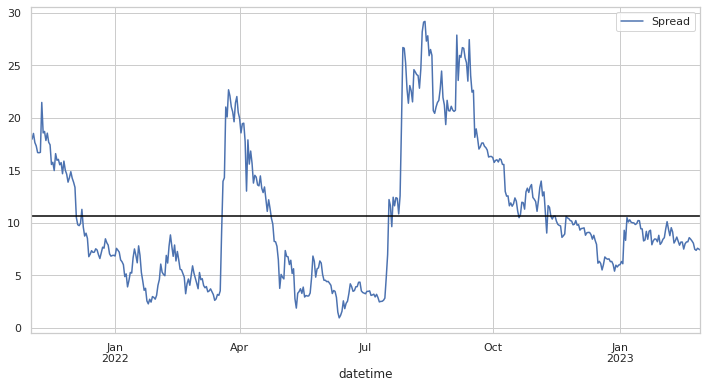

In [ ]:
spread('Bitcoin','Ethereum Classic',data)

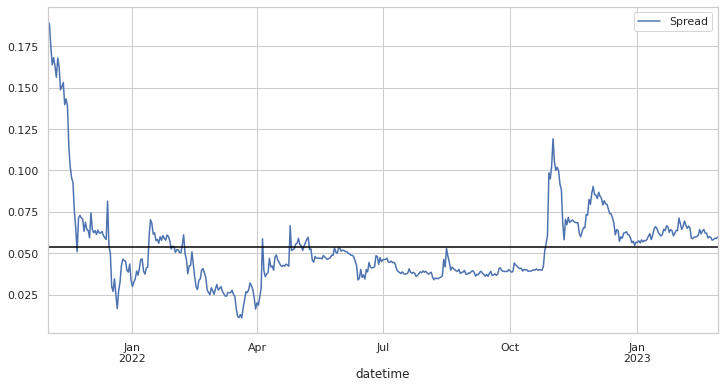

In [ ]:
spread('Avalanche','Dogecoin',data)

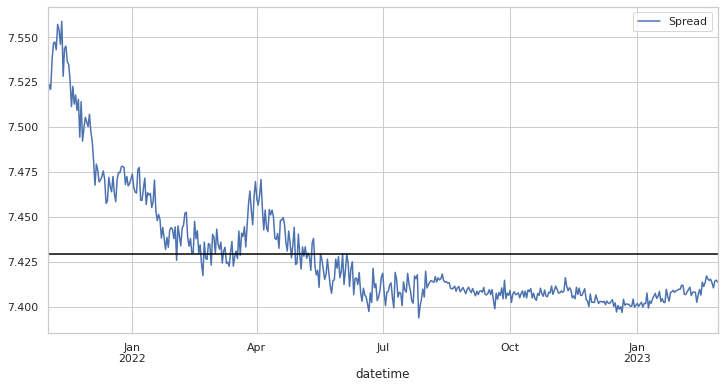

In [ ]:
spread('Binance USD','VeChain',data)

### Ratio

fill nan/inf ratio which divided by 0 with mean btw prev-next value

**problem if there's more than one & continuous value

In [ ]:
def ratio(curr1,curr2,data):
    c1 = data[curr1]
    c2 = data[curr2]
    r = c1/c2

    idx_array = r.index[r==float('inf')].values
    idx_empty = idx_array.size == 0

    if idx_empty==False :
      for idx in idx_array: r[idx] = (r[idx-1] + r[idx+1])/2

    return r

In [ ]:
def ratio_plot(r):
    r.plot(figsize=(12,6))
    plt.axhline(r.mean(), color='black')
    plt.legend(['Price Ratio']);

In [ ]:
r = ratio('Bitcoin','Ethereum',data)
r

datetime
2021-11-01 00:00:00+00:00    14.106283
2021-11-02 00:00:00+00:00    13.790442
2021-11-03 00:00:00+00:00    13.667767
2021-11-04 00:00:00+00:00    13.543716
2021-11-05 00:00:00+00:00    13.625135
                               ...    
2023-02-24 00:00:00+00:00    14.423349
2023-02-25 00:00:00+00:00    14.530791
2023-02-26 00:00:00+00:00    14.359438
2023-02-27 00:00:00+00:00    14.393008
2023-02-28 00:00:00+00:00    14.353622
Freq: D, Length: 485, dtype: float64

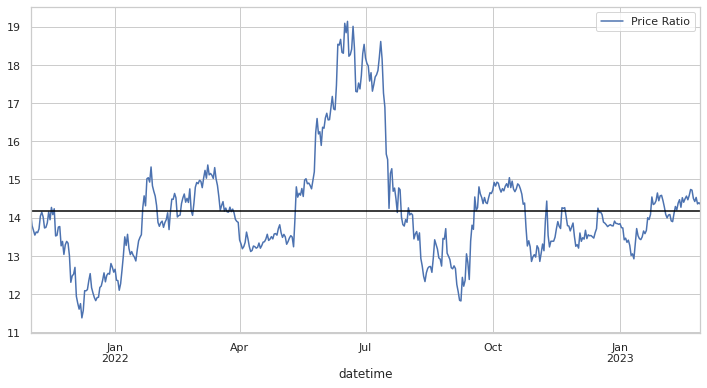

In [ ]:
ratio_plot(r)

### Z-score

A z-score is the number of standard deviations a datapoint is from the mean. More importantly, the nmber of standard deviations above or below the population mean is from the raw score. The z-score is calculated by the follow:

$$\mathcal{z}_{i}=\frac{x_{i}-\bar{x}}{s} $$

In [ ]:
data[data['Avalanche']==0]

,Bitcoin,Ethereum,Tether,USD Coin,Binance USD,Cardano,Dogecoin,Solana,OKB,Shiba Inu,...,Algorand,VeChain,Internet Computer,Axie Infinity,Decentraland,The Sandbox,Flow,Aave,EOS,Fantom
datetime,,,,,,,,,,,,,,,,,,,,,


In [ ]:
data[data['Dogecoin']==0]

,Bitcoin,Ethereum,Tether,USD Coin,Binance USD,Cardano,Dogecoin,Solana,OKB,Shiba Inu,...,Algorand,VeChain,Internet Computer,Axie Infinity,Decentraland,The Sandbox,Flow,Aave,EOS,Fantom
datetime,,,,,,,,,,,,,,,,,,,,,


In [ ]:
def zscore_cal(series):
    return (series - series.mean()) / np.std(series)

In [ ]:
def zscore(curr1,curr2,data):
    c1 = data[curr1]
    c2 = data[curr2]
    r = ratio(curr1,curr2,data)
    zscore_series = zscore_cal(r)
    zscore_series.plot(figsize=(12,6))
    plt.axhline(zscore_cal(r).mean())
    plt.axhline(1.0, color='red')
    plt.axhline(-1.0, color='green')
    plt.show()

    return zscore_series

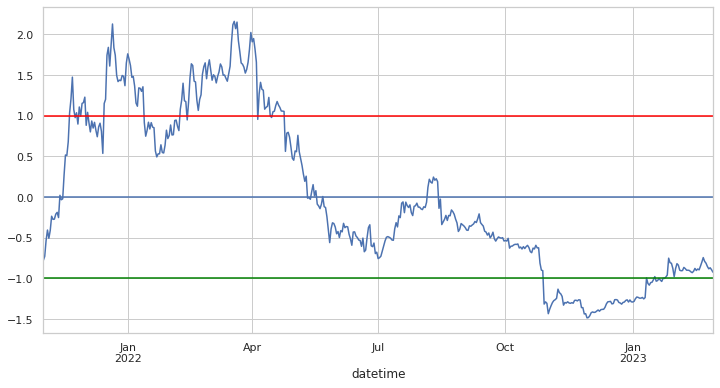

datetime
2021-11-01 00:00:00+00:00   -0.777962
2021-11-02 00:00:00+00:00   -0.729763
2021-11-03 00:00:00+00:00   -0.533148
2021-11-04 00:00:00+00:00   -0.405109
2021-11-05 00:00:00+00:00   -0.506387
                               ...   
2023-02-24 00:00:00+00:00   -0.853050
2023-02-25 00:00:00+00:00   -0.881691
2023-02-26 00:00:00+00:00   -0.869243
2023-02-27 00:00:00+00:00   -0.892565
2023-02-28 00:00:00+00:00   -0.922923
Freq: D, Length: 485, dtype: float64

In [ ]:
zscore('Avalanche','Dogecoin',data)

## Trading Signals

use the ratio time series to tells us whether to buy or sell a particular moment in time

a prediction variable $Y$

ratio is positive = "buy"

$$Y_{t} = sign(Ratio_{t+1}-Ratio_{t}) $$

we need to know is where it's heading: up or down.

In [ ]:
ratio_data = ratio('Bitcoin','Ethereum Classic',data)
ratio_data

datetime
2021-11-01 00:00:00+00:00    1133.982626
2021-11-02 00:00:00+00:00    1146.684253
2021-11-03 00:00:00+00:00    1134.047353
2021-11-04 00:00:00+00:00    1142.846286
2021-11-05 00:00:00+00:00    1147.876306
                                ...     
2023-02-24 00:00:00+00:00    1099.116227
2023-02-25 00:00:00+00:00    1104.022791
2023-02-26 00:00:00+00:00    1100.215265
2023-02-27 00:00:00+00:00    1103.536027
2023-02-28 00:00:00+00:00    1107.545866
Freq: D, Length: 485, dtype: float64

In [ ]:
type(ratio_data)

pandas.core.series.Series

In [ ]:
ratio_data

datetime
2021-11-01 00:00:00+00:00    1133.982626
2021-11-02 00:00:00+00:00    1146.684253
2021-11-03 00:00:00+00:00    1134.047353
2021-11-04 00:00:00+00:00    1142.846286
2021-11-05 00:00:00+00:00    1147.876306
                                ...     
2023-02-24 00:00:00+00:00    1099.116227
2023-02-25 00:00:00+00:00    1104.022791
2023-02-26 00:00:00+00:00    1100.215265
2023-02-27 00:00:00+00:00    1103.536027
2023-02-28 00:00:00+00:00    1107.545866
Freq: D, Length: 485, dtype: float64

In [ ]:
a = {'ratio': ratio_data}
df = pd.DataFrame(a)
cols = df.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
ratio_normalized = df_normalized.squeeze()
ratio_normalized

0      0.572998
1      0.584505
2      0.573056
3      0.581028
4      0.585585
         ...   
480    0.541411
481    0.545856
482    0.542406
483    0.545415
484    0.549047
Name: ratio, Length: 485, dtype: float64

In [ ]:
# cols = data.columns
# df = pd.DataFrame(data)
# df

# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(df)
# df_normalized = pd.DataFrame(np_scaled, columns = cols)
# df_normalized

In [ ]:
# ratios_scaled = min_max_scaler.fit_transform(ratio_data)

#### Train Test Split

In [ ]:
def_type = 'pr'
def_portion_train_all = 0.8
def_portion_train = 0.8

In [ ]:
def convert_split(data,type,portion_train_all,portion_train):

    # convert type of data
    if type=='re':
        data = data.pct_change().dropna()
    elif type=='logpr':
        data = data.apply(lambda x: np.log(x))
    elif type=='logre':
        data = data.apply(lambda x: np.log(x) - np.log(x.shift(1))).dropna()

    # splitting
    data_train, data_test = np.split(data, [int(portion_train_all *len(data))])
    data_train, data_valid = np.split(data_train, [int(portion_train *len(data_train))])

    return data_train, data_valid, data_test

In [ ]:
train, valid, test = convert_split(ratio_data,def_type,def_portion_train_all,def_portion_train)

In [ ]:
train.shape

(310,)

#### Creating a Model

A standard normal distribution has a mean of 0 and a standard deviation 1. Looking at the plot, it's pretty clear that if the time series moves 1 standard deviation beyond the mean, it tends to revert back towards the mean. Using these models, we can create the following trading signals:

* Buy(1) whenever the z-score is below -1, meaning we expect the ratio to increase.
* Sell(-1) whenever the z-score is above 1, meaning we expect the ratio to decrease.

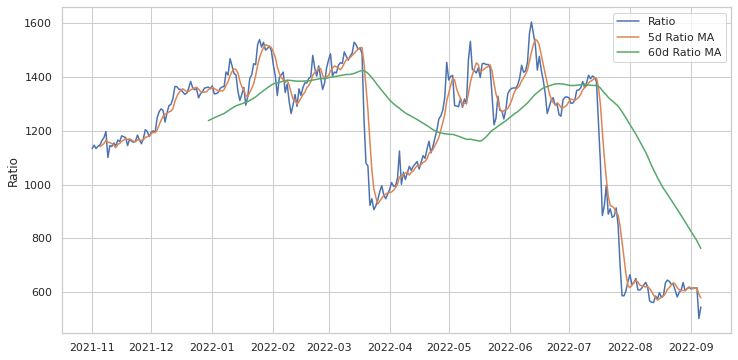

In [ ]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

In [ ]:
ratios_mavg5.index.shape

(310,)

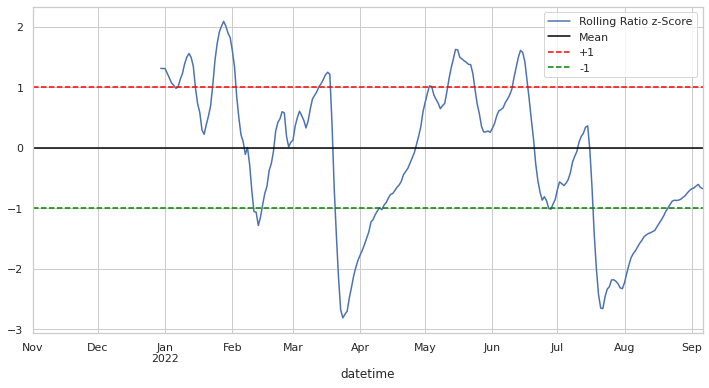

In [ ]:
plt.figure(figsize=(12,6))
zscore_60_5.plot() #2
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

In [ ]:
zscore_60_5

datetime
2021-11-01 00:00:00+00:00         NaN
2021-11-02 00:00:00+00:00         NaN
2021-11-03 00:00:00+00:00         NaN
2021-11-04 00:00:00+00:00         NaN
2021-11-05 00:00:00+00:00         NaN
                               ...   
2022-09-02 00:00:00+00:00   -0.668161
2022-09-03 00:00:00+00:00   -0.635999
2022-09-04 00:00:00+00:00   -0.608919
2022-09-05 00:00:00+00:00   -0.657773
2022-09-06 00:00:00+00:00   -0.680337
Freq: D, Length: 310, dtype: float64

In [ ]:
type(ratios_mavg5)

pandas.core.series.Series

In [ ]:
type(ratios_mavg5.index)

pandas.core.indexes.datetimes.DatetimeIndex

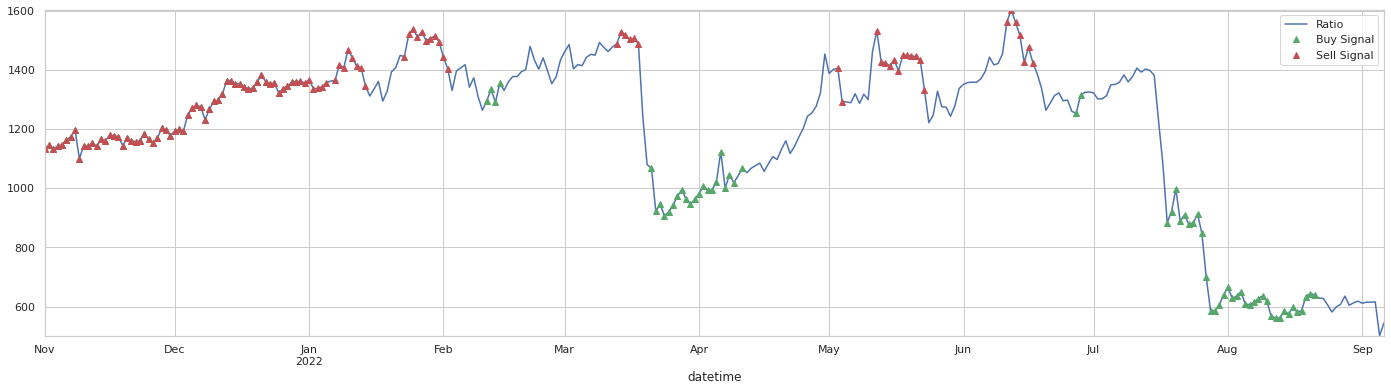

In [ ]:
plt.figure(figsize=(24,6))

train.plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio_data.min(), ratio_data.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

In [ ]:
len(train)

310

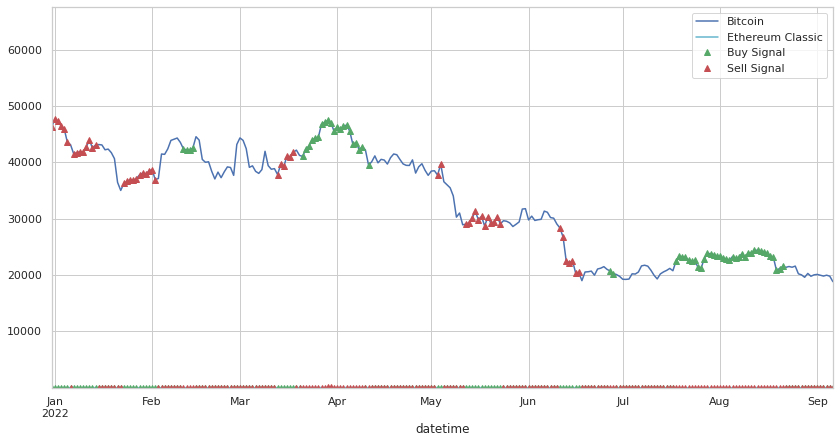

In [ ]:
plt.figure(figsize=(14,7))
S1 = data['Bitcoin'].iloc[:len(train)]
S2 = data['Ethereum Classic'].iloc[:len(train)]
S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
# plt.ylim(25, 105)

plt.legend(['Bitcoin', 'Ethereum Classic', 'Buy Signal', 'Sell Signal'])
plt.show()

In [ ]:
buyR[sell!=0]

datetime
2021-11-01 00:00:00+00:00    53.796599
2021-11-02 00:00:00+00:00    55.138458
2021-11-03 00:00:00+00:00    55.526824
2021-11-04 00:00:00+00:00    53.771213
2021-11-05 00:00:00+00:00    53.251099
                               ...    
2022-06-13 00:00:00+00:00    14.395306
2022-06-14 00:00:00+00:00    14.622905
2022-06-15 00:00:00+00:00    15.827472
2022-06-16 00:00:00+00:00    13.796279
2022-06-17 00:00:00+00:00    14.360857
Name: Bitcoin, Length: 112, dtype: float64

In [ ]:
type(sell!=0)

pandas.core.series.Series

In [ ]:
sellR

datetime
2021-11-01 00:00:00+00:00    61004.408021
2021-11-02 00:00:00+00:00    63226.401097
2021-11-03 00:00:00+00:00    62970.047426
2021-11-04 00:00:00+00:00    61452.230587
2021-11-05 00:00:00+00:00    61125.674269
                                 ...     
2022-09-02 00:00:00+00:00        0.000000
2022-09-03 00:00:00+00:00        0.000000
2022-09-04 00:00:00+00:00        0.000000
2022-09-05 00:00:00+00:00        0.000000
2022-09-06 00:00:00+00:00        0.000000
Freq: D, Name: Bitcoin, Length: 310, dtype: float64

In [ ]:
sell

datetime
2021-11-01 00:00:00+00:00    1133.982626
2021-11-02 00:00:00+00:00    1146.684253
2021-11-03 00:00:00+00:00    1134.047353
2021-11-04 00:00:00+00:00    1142.846286
2021-11-05 00:00:00+00:00    1147.876306
                                ...     
2022-09-02 00:00:00+00:00       0.000000
2022-09-03 00:00:00+00:00       0.000000
2022-09-04 00:00:00+00:00       0.000000
2022-09-05 00:00:00+00:00       0.000000
2022-09-06 00:00:00+00:00       0.000000
Freq: D, Length: 310, dtype: float64